In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
import warnings
# Suppress FutureWarning from KMeans
warnings.simplefilter(action='ignore', category=FutureWarning)

Exemple :  Dendrogramme and Agglomerative Clustering
---------------------------------------
Affichage données initiales            xclara.arff


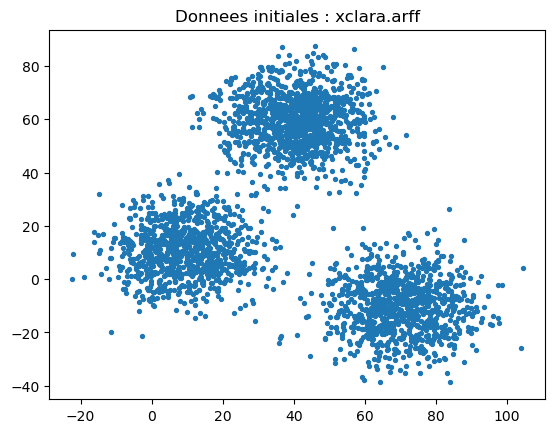

In [2]:
 print("Exemple :  Dendrogramme and Agglomerative Clustering")
##################################################################



path = '/home/khira/Téléchargements/artificial/'
name="xclara.arff"

#path_out = './fig/'
databrut = arff.loadarff(open(path+str(name), 'r'))
datanp = np.array([[x[0],x[1]] for x in databrut[0]])
print("---------------------------------------")
print("Affichage données initiales            "+ str(name))
f0 = datanp[:,0] # tous les élements de la première colonne
f1 = datanp[:,1] # tous les éléments de la deuxième colonne

#plt.figure(figsize=(6, 6))
plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales : "+ str(name))
#plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-init.jpg",bbox_inches='tight', pad_inches=0.1)
plt.show()

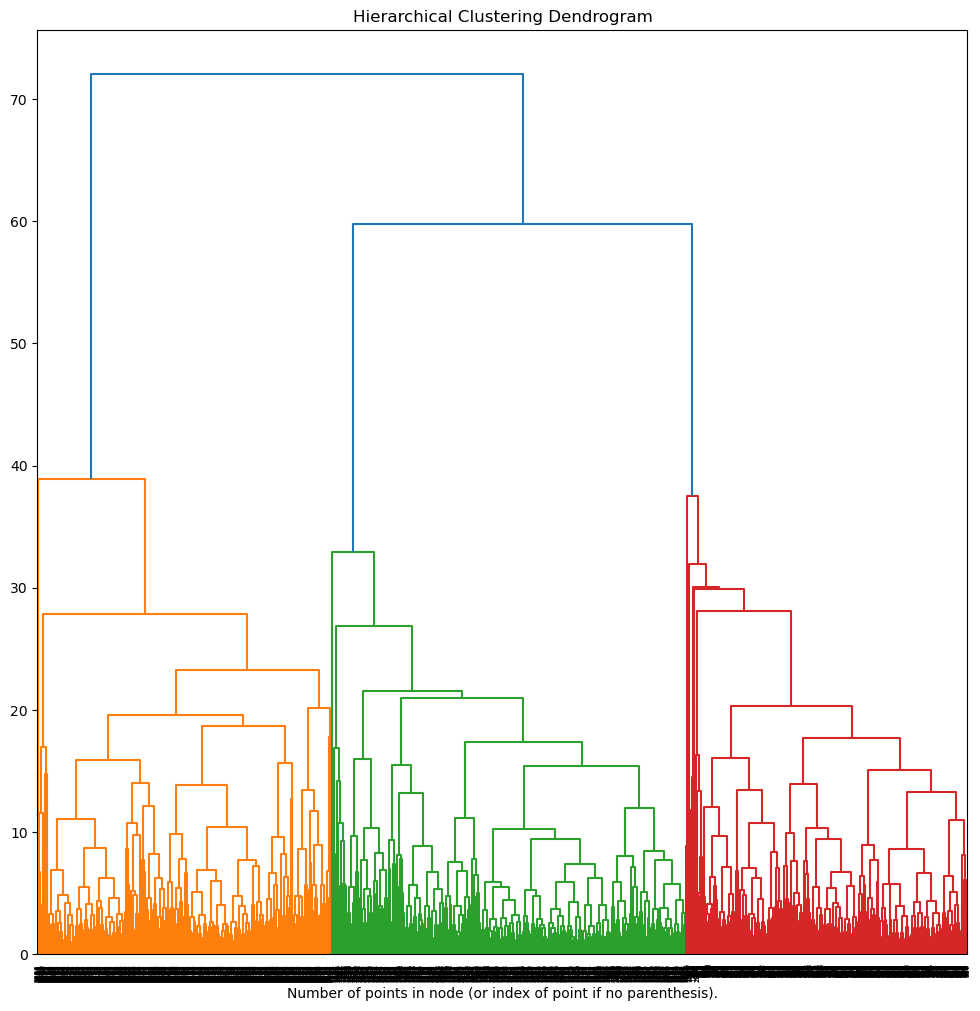

 runtime =  164.69 ms


In [11]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix) #, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
tp1=time.time()
model = cluster.AgglomerativeClustering(distance_threshold=0, linkage='average', n_clusters=None)
model = model.fit(datanp)
tp2=time.time()
plt.figure(figsize=(12, 12))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top p levels of the dendrogram
plot_dendrogram(model) #, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
print(" runtime = ", round((tps2 - tps1)*1000,2),"ms")

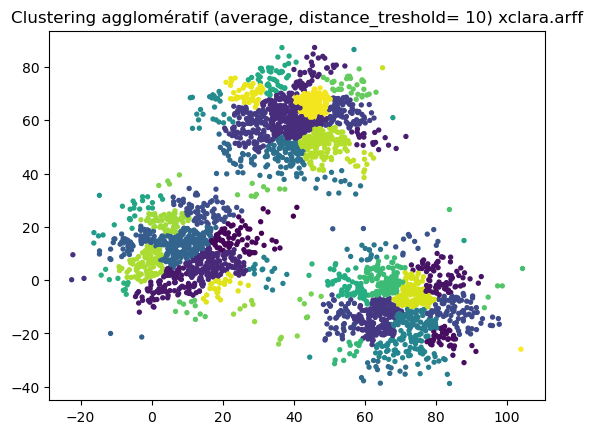

nb clusters = 64 , nb feuilles =  3000  runtime =  169.22 ms


In [3]:
### FIXER la distance
# 
tps1 = time.time()
seuil_dist = 10
model = cluster.AgglomerativeClustering(distance_threshold=seuil_dist, linkage='average', n_clusters=None)
model = model.fit(datanp)
tps2 = time.time()
labels = model.labels_
# Nb iteration of this method
#iteration = model.n_iter_
k = model.n_clusters_
leaves=model.n_leaves_
plt.scatter(f0, f1, c=labels, s=8)
plt.title("Clustering agglomératif (average, distance_treshold= "+str(seuil_dist)+") "+str(name))
plt.show()
print("nb clusters =",k,", nb feuilles = ", leaves, " runtime = ", round((tps2 - tps1)*1000,2),"ms")

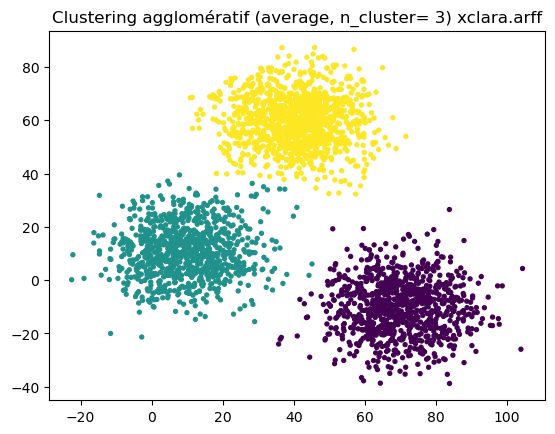

nb clusters = 3 , nb feuilles =  3000  runtime =  184.99 ms


In [10]:
# FIXER le nombre de clusters
###
k=3
tps1 = time.time()
model = cluster.AgglomerativeClustering(linkage='average', n_clusters=k)
model = model.fit(datanp)
tps2 = time.time()
labels = model.labels_
# Nb iteration of this method
#iteration = model.n_iter_
kres = model.n_clusters_
leaves=model.n_leaves_
#print(labels)
#print(kres)

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Clustering agglomératif (average, n_cluster= "+str(k)+") "+str(name))
plt.show()
print("nb clusters =",kres,", nb feuilles = ", leaves, " runtime = ", round((tps2 - tps1)*1000,2),"ms")

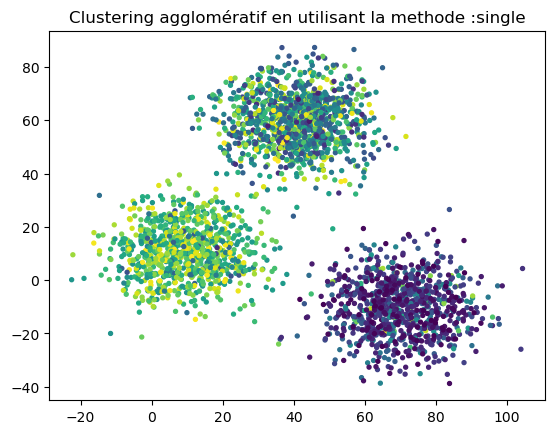

nb clusters = 3000 , nb feuilles =  3000  runtime =  59.43 ms


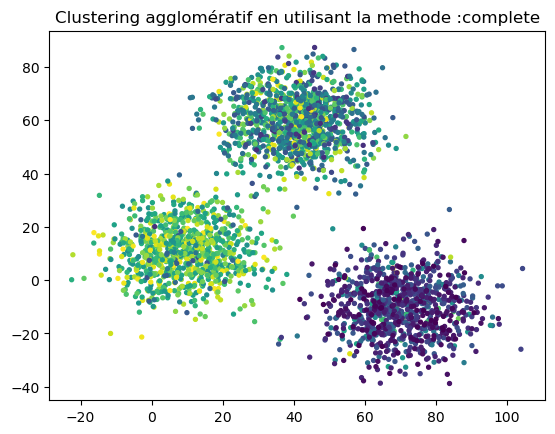

nb clusters = 3000 , nb feuilles =  3000  runtime =  190.24 ms


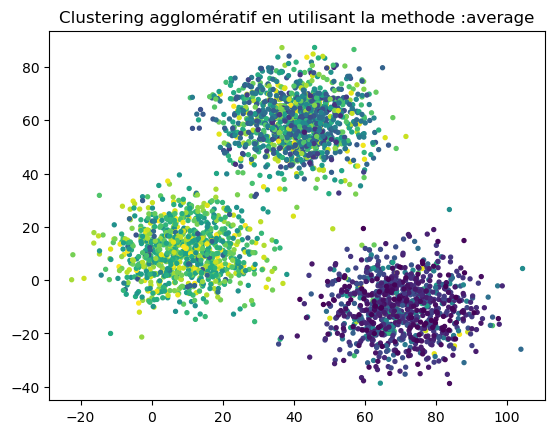

nb clusters = 3000 , nb feuilles =  3000  runtime =  183.86 ms


In [11]:
liste=["single","complete","average"]
methods=[]
for var in liste:
    tps1 = time.time()
    model = cluster.AgglomerativeClustering(distance_threshold=0, linkage=var, n_clusters=None)
    model = model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    k = model.n_clusters_
    leaves=model.n_leaves_
    plt.scatter(f0, f1, c=labels, s=8)
    plt.title(f"Clustering agglomératif en utilisant la methode :{var}")
    plt.show()
    print("nb clusters =",k,", nb feuilles = ", leaves, " runtime = ",round((tps2 - tps1)*1000,2),"ms")
    



In [9]:
# Définissez la plage de valeurs pour le seuil de distance 
k_values = range(2, 11)  

# Initialisez les listes pour stocker les scores et les temps d'exécution
scores = []
methods_execution_times = []
best_k=None
best_score=-1
for k in k_values:
    # Ajustez le modèle AgglomerativeClustering avec le seuil actuel
    agglomerative_clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage="complete", distance_threshold=None)
    
    # Mesurez le temps d'exécution
    start_time = time.time()
    agglomerative_labels =agglomerative_clustering.fit_predict(datanp)
    end_time = time.time()
    execution_time = end_time - start_time
    #methods_execution_times[k]=execution_time
    methods_execution_times.append(execution_time) 
    

    # Calculez le score en fonction de la métrique d'évaluation choisie
    score = silhouette_score(datanp, agglomerative_labels)
    if score > best_score:
        best_score= score
        best_k = k
#execution_times[var]=methods_execution_times
print("-----------------------------methode:complete--------------------------------------------")
print(f"Meilleur nombre de cluster : {best_k}")
model = cluster.AgglomerativeClustering(distance_threshold=None, linkage="complete", n_clusters = best_k)
model = model.fit(datanp)
labels = model.labels_
leaves=model.n_leaves_
plt.scatter(f0, f1, c=labels, s=8)
plt.title("Clustering agglomératif en utilisant la methode :complete")
plt.show()
print("nb clusters =",best_k,", nb feuilles = ", leaves)
print(f"Scores de silhouette pour le meilleur nombre de cluster:{best_score}")
    
# Maintenant, tracez le temps d'executions en fonction de k
plt.plot(range(2, 11),methods_execution_times, marker='o')
    plt.xlabel('Nombre de clusters (k)')
    plt.ylabel("temps d'executions")
    plt.title("le temps d'executions en utilisant la methode complete")
    plt.show()
    methods_execution_times=[]
    


IndentationError: unexpected indent (2746678532.py, line 42)

Affichage données initiales de dataset et l'affichage de score de silhouette en fonction du nombre de clusters            


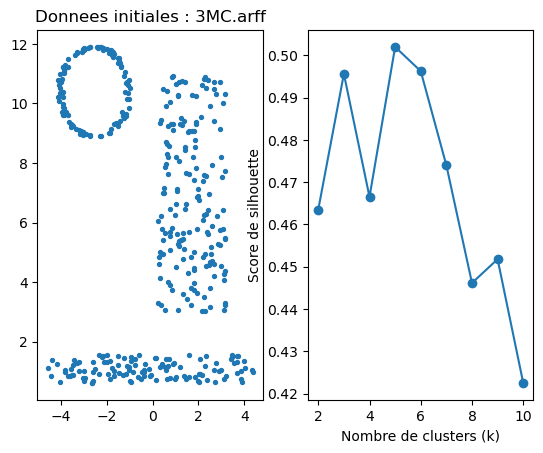

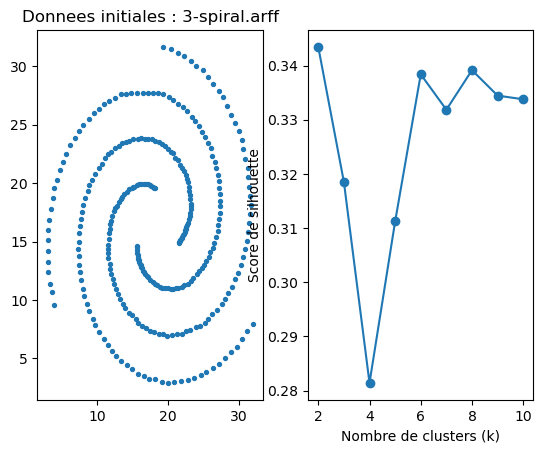

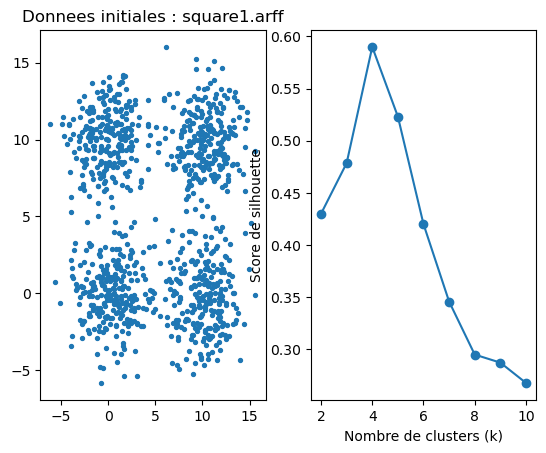

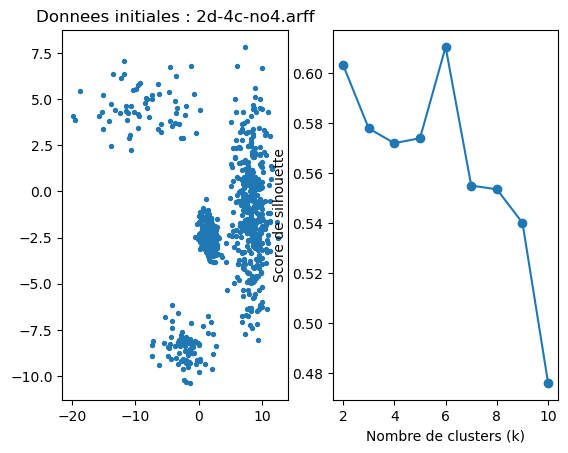

In [15]:
# fonction qui permet de transformer un dataset en un tableau de deux dimention
def data_transform(filename):
    databrut = arff.loadarff(open(path+str(filename), 'r'))
    return np.array([[x[0],x[1]] for x in databrut[0]])

path = '/home/khira/Téléchargements/'
name1="3MC.arff"
name2="3-spiral.arff"
name3="square1.arff"
name4="2d-4c-no4.arff"

from sklearn.metrics import silhouette_score
data_names=[name1,name2,name3,name4]
silhouette_scores = []
execution_times = []
print("Affichage données initiales de dataset et l'affichage de score de silhouette en fonction du nombre de clusters            ")
for name in data_names:
    for k in k_values:
        data=data_transform(name)
        model = cluster.AgglomerativeClustering(distance_threshold=None, linkage=var, n_clusters = k)
        labels = model.fit_predict(data)

        # Mesurez le temps de calcul
        end_time = time.time()
        execution_time = end_time - start_time
        execution_times.append(execution_time)

        # Calculez les scores de silhouette, Davies-Bouldin et Calinski-Harabasz
        silhouette = silhouette_score(data, labels)
        silhouette_scores.append(silhouette)    
    f0 = data[:,0] # tous les élements de la première colonne
    f1 = data[:,1] # tous les éléments de la deuxième colonne
    plt.subplot(1, 2, 1)
    plt.scatter(f0, f1, s=8)
    plt.title("Donnees initiales : "+ str(name))
    # Maintenant, tracez le score de silhouette en fonction de k
    plt.subplot(1, 2, 2)
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.xlabel('Nombre de clusters (k)')
    plt.ylabel('Score de silhouette')
    plt.show()
    silhouette_scores = []
    